In [232]:
#Import Libaries 

In [233]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns 
import sqlite3
from pathlib import Path as Path
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from matplotlib import colormaps
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline


In [234]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [ ]:
#Importing  district performance rate dataset for 2021-2022 school year (Dataset#1)

In [235]:
dis_rate=pd.read_csv('districtrate2022.csv')

In [ ]:
#Data cleaning of Dataset #1

In [236]:
dis_rate.head()

,staar_comp_score,grad_rate,stu_ach_rate,stu_ach_score,acad_growth_rate,acad_growth_score,relative_perf_rating,relative_perf_score,closing_gaps_rat,closing_gaps_score,dis_overall_score,dist_name,total_stu_count,ecodis_pct,lep_pct,sped_pct,D_RATING
0,90,100,A,95,B,84,A,93,A,93,94,CAYUGA ISD,574,40.8,1.0,14.6,A
1,88,100,A,93,B,85,A,92,B,87,91,ELKHART ISD,1150,45.4,2.8,12.1,A
2,86,100,A,92,B,87,A,92,A,91,92,FRANKSTON ISD,808,54.2,4.1,13.1,A
3,90,100,A,95,A,92,A,94,A,100,97,NECHES ISD,342,54.1,2.0,10.5,A
4,79,95,B,88,B,87,A,92,B,83,89,PALESTINE ISD,3360,81.6,17.7,13.5,B


In [237]:
dis_rate_new=dis_rate.rename(columns={'dist_name': 'district_name'})

In [238]:
dis_rate_new.head()

,staar_comp_score,grad_rate,stu_ach_rate,stu_ach_score,acad_growth_rate,acad_growth_score,relative_perf_rating,relative_perf_score,closing_gaps_rat,closing_gaps_score,dis_overall_score,district_name,total_stu_count,ecodis_pct,lep_pct,sped_pct,D_RATING
0,90,100,A,95,B,84,A,93,A,93,94,CAYUGA ISD,574,40.8,1.0,14.6,A
1,88,100,A,93,B,85,A,92,B,87,91,ELKHART ISD,1150,45.4,2.8,12.1,A
2,86,100,A,92,B,87,A,92,A,91,92,FRANKSTON ISD,808,54.2,4.1,13.1,A
3,90,100,A,95,A,92,A,94,A,100,97,NECHES ISD,342,54.1,2.0,10.5,A
4,79,95,B,88,B,87,A,92,B,83,89,PALESTINE ISD,3360,81.6,17.7,13.5,B


In [ ]:
#Importing  PEIMS finanical dataset covering overall school funding for 2017-2022 (Dataset#2)

In [239]:
fin_data=pd.read_csv('2007_2022_peims_financial_data.csv')

In [ ]:
#Data cleaning of Dataset #2

In [240]:
fin_data.head()

,DISTRICT NUMBER,DISTRICT NAME,YEAR,GEN FUNDS-LOCAL TAX REVENUE FROM M&O,ALL FUNDS-LOCAL TAX REVENUE FROM M&O,GEN FUNDS-STATE REVENUE,ALL FUNDS-STATE REVENUE,GEN FUNDS-FEDERAL REVENUE,ALL FUNDS-FEDERAL REVENUE,GEN FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE,...,ALL FUNDS-TOTAL OTHER USES,GEN FUNDS-INTERGOVERN CHARGES EXPEND,ALL FUNDS-INTERGOVERN CHARGES EXPEND,GEN FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,ALL FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,GEN FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,ALL FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,GEN FUNDS-TOTAL DISBURSEMENTS,ALL FUNDS-TOTAL DISBURSEMENTS,FALL SURVEY ENROLLMENT
0,1902,CAYUGA ISD,2007,"$4,122,552","$4,122,552","$1,114,179","$1,176,283",$0,"$250,168","$215,239",...,"$5,829","$70,703","$70,703","$421,865","$421,865","$145,130","$156,886","$4,907,206","$5,348,377",569
1,1902,CAYUGA ISD,2008,"$3,641,351","$3,641,351","$1,845,232","$2,350,131",$0,"$1,852,221","$183,293",...,"$15,000","$75,304","$210,304",$0,$0,"$647,852","$632,398","$5,391,975","$8,274,772",580
2,1902,CAYUGA ISD,2009,"$3,319,164","$3,319,164","$1,950,169","$2,473,373",$0,"$1,714,988","$123,568",...,$0,"$166,251","$166,251",$0,$0,"$722,766","$803,313","$6,006,273","$8,819,439",594
3,1902,CAYUGA ISD,2010,"$3,222,688","$3,222,688","$2,302,369","$2,917,268",$0,"$2,851,372","$161,664",...,"$63,586","$90,462","$168,462",$0,$0,"$1,498,127","$1,582,837","$6,634,887","$10,471,817",628
4,1902,CAYUGA ISD,2011,"$3,152,618","$3,152,618","$2,439,570","$3,091,438",$0,"$2,687,377","$134,887",...,"$30,213","$96,141","$168,750",$0,$0,"$261,902","$272,638","$5,239,822","$8,883,753",606


In [241]:
fin_data.dtypes

DISTRICT NUMBER                                    int64
DISTRICT NAME                                     object
YEAR                                               int64
GEN FUNDS-LOCAL TAX REVENUE FROM M&O              object
ALL FUNDS-LOCAL TAX REVENUE FROM M&O              object
                                                   ...  
GEN FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD    object
ALL FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD    object
GEN FUNDS-TOTAL DISBURSEMENTS                     object
ALL FUNDS-TOTAL DISBURSEMENTS                     object
FALL SURVEY ENROLLMENT                            object
Length: 142, dtype: object

In [242]:
##Drop all general columns 

In [243]:
gen_drop='GEN'

In [244]:
columns_to_drop = [col for col in fin_data.columns if col.startswith(gen_drop)]

In [245]:
fin_data.drop(columns=columns_to_drop, inplace=True)

In [246]:
fin_data.head()

,DISTRICT NUMBER,DISTRICT NAME,YEAR,ALL FUNDS-LOCAL TAX REVENUE FROM M&O,ALL FUNDS-STATE REVENUE,ALL FUNDS-FEDERAL REVENUE,ALL FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE,ALL FUNDS-TOTAL OPERATING REVENUE,ALL FUNDS-LOCAL PROPERTY TAXES FROM I&S,ALL FUNDS-STATE DEBT FUNDS,...,ALL FUNDS-TOT NON-OPER EXPENDITURES BY PIC,ALL FUNDS-TOT OPER AND NON-OPER EXP BY PIC,ALL FUNDS-TOTAL OPER EXPENDITURES FOR TD,ALL FUNDS-EQUITY TRANSFERS FOR TD,ALL FUNDS-TOTAL OTHER USES,ALL FUNDS-INTERGOVERN CHARGES EXPEND,ALL FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,ALL FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,ALL FUNDS-TOTAL DISBURSEMENTS,FALL SURVEY ENROLLMENT
0,1902,CAYUGA ISD,2007,"$4,122,552","$1,176,283","$250,168","$354,535","$5,903,538",$0,$0,...,"$578,751","$5,271,845","$4,693,094",$0,"$5,829","$70,703","$421,865","$156,886","$5,348,377",569
1,1902,CAYUGA ISD,2008,"$3,641,351","$2,350,131","$1,852,221","$609,434","$8,453,137",$0,$0,...,"$632,398","$8,049,468","$7,417,070",$0,"$15,000","$210,304",$0,"$632,398","$8,274,772",580
2,1902,CAYUGA ISD,2009,"$3,319,164","$2,473,373","$1,714,988","$521,780","$8,029,305",$0,$0,...,"$803,313","$8,467,591","$7,664,278","$185,597",$0,"$166,251",$0,"$803,313","$8,819,439",594
3,1902,CAYUGA ISD,2010,"$3,222,688","$2,917,268","$2,851,372","$665,811","$9,657,139",$0,$0,...,"$1,582,837","$10,239,769","$8,656,932",$0,"$63,586","$168,462",$0,"$1,582,837","$10,471,817",628
4,1902,CAYUGA ISD,2011,"$3,152,618","$3,091,438","$2,687,377","$603,182","$9,534,615",$0,$0,...,"$272,638","$8,684,790","$8,412,152",$0,"$30,213","$168,750",$0,"$272,638","$8,883,753",606


In [ ]:
##Changing column text 

In [247]:
fin_data.columns = fin_data.columns.str.replace(' ', '_')
fin_data.columns = fin_data.columns.str.replace('-', '_')

In [248]:
fin_data_new=fin_data.rename(columns={'DISTRICT_NAME': 'district_name'})

In [249]:
fin_data_new.head()

,DISTRICT_NUMBER,district_name,YEAR,ALL_FUNDS_LOCAL_TAX_REVENUE_FROM_M&O,ALL_FUNDS_STATE_REVENUE,ALL_FUNDS_FEDERAL_REVENUE,ALL_FUNDS_OTHER_LOCAL_&_INTERMEDIATE_REVENUE,ALL_FUNDS_TOTAL_OPERATING_REVENUE,ALL_FUNDS_LOCAL_PROPERTY_TAXES_FROM_I&S,ALL_FUNDS_STATE_DEBT_FUNDS,...,ALL_FUNDS_TOT_NON_OPER_EXPENDITURES_BY_PIC,ALL_FUNDS_TOT_OPER_AND_NON_OPER_EXP_BY_PIC,ALL_FUNDS_TOTAL_OPER_EXPENDITURES_FOR_TD,ALL_FUNDS_EQUITY_TRANSFERS_FOR_TD,ALL_FUNDS_TOTAL_OTHER_USES,ALL_FUNDS_INTERGOVERN_CHARGES_EXPEND,ALL_FUNDS_DEBT_SERVICE_(OBJECT_6500)_FOR_TD,ALL_FUNDS_CAPITAL_PROJECTS(OBJECT_6600)_FOR_TD,ALL_FUNDS_TOTAL_DISBURSEMENTS,FALL_SURVEY_ENROLLMENT
0,1902,CAYUGA ISD,2007,"$4,122,552","$1,176,283","$250,168","$354,535","$5,903,538",$0,$0,...,"$578,751","$5,271,845","$4,693,094",$0,"$5,829","$70,703","$421,865","$156,886","$5,348,377",569
1,1902,CAYUGA ISD,2008,"$3,641,351","$2,350,131","$1,852,221","$609,434","$8,453,137",$0,$0,...,"$632,398","$8,049,468","$7,417,070",$0,"$15,000","$210,304",$0,"$632,398","$8,274,772",580
2,1902,CAYUGA ISD,2009,"$3,319,164","$2,473,373","$1,714,988","$521,780","$8,029,305",$0,$0,...,"$803,313","$8,467,591","$7,664,278","$185,597",$0,"$166,251",$0,"$803,313","$8,819,439",594
3,1902,CAYUGA ISD,2010,"$3,222,688","$2,917,268","$2,851,372","$665,811","$9,657,139",$0,$0,...,"$1,582,837","$10,239,769","$8,656,932",$0,"$63,586","$168,462",$0,"$1,582,837","$10,471,817",628
4,1902,CAYUGA ISD,2011,"$3,152,618","$3,091,438","$2,687,377","$603,182","$9,534,615",$0,$0,...,"$272,638","$8,684,790","$8,412,152",$0,"$30,213","$168,750",$0,"$272,638","$8,883,753",606


In [ ]:
#Merging Dataset #1 and Dataset #2

In [250]:
connected=pd.merge(fin_data_new,dis_rate_new, on='district_name', how='inner')

In [251]:
connected.isna().sum()

DISTRICT_NUMBER                         0
district_name                           0
YEAR                                    0
ALL_FUNDS_LOCAL_TAX_REVENUE_FROM_M&O    0
ALL_FUNDS_STATE_REVENUE                 0
                                       ..
total_stu_count                         0
ecodis_pct                              0
lep_pct                                 0
sped_pct                                0
D_RATING                                0
Length: 89, dtype: int64

In [ ]:
#Sending the merged dataset to a csv file

In [252]:
connected_csv =connected.to_csv("connected.csv")

In [ ]:
#Connecting merge dataset to SQL to conduted clean and examine merged dataset 

In [253]:
Path('connected.db').touch()
connected_conn = sqlite3.connect('connected.db')
connected_cursor = connected_conn.cursor()

In [254]:
connected.to_sql('connected', connected_conn, if_exists='append', index=False)

18295

In [255]:
connected_query = pd.read_sql(''' SELECT * FROM connected ''', connected_conn)
connected_query

,DISTRICT_NUMBER,district_name,YEAR,ALL_FUNDS_LOCAL_TAX_REVENUE_FROM_M&O,ALL_FUNDS_STATE_REVENUE,ALL_FUNDS_FEDERAL_REVENUE,ALL_FUNDS_OTHER_LOCAL_&_INTERMEDIATE_REVENUE,ALL_FUNDS_TOTAL_OPERATING_REVENUE,ALL_FUNDS_LOCAL_PROPERTY_TAXES_FROM_I&S,ALL_FUNDS_STATE_DEBT_FUNDS,...,relative_perf_rating,relative_perf_score,closing_gaps_rat,closing_gaps_score,dis_overall_score,total_stu_count,ecodis_pct,lep_pct,sped_pct,D_RATING
0,1902,CAYUGA ISD,2007,"$4,122,552","$1,176,283","$250,168","$354,535","$5,903,538",$0,$0,...,A,93,A,93,94,574,40.8,1.0,14.6,A
1,1902,CAYUGA ISD,2008,"$3,641,351","$2,350,131","$1,852,221","$609,434","$8,453,137",$0,$0,...,A,93,A,93,94,574,40.8,1.0,14.6,A
2,1902,CAYUGA ISD,2009,"$3,319,164","$2,473,373","$1,714,988","$521,780","$8,029,305",$0,$0,...,A,93,A,93,94,574,40.8,1.0,14.6,A
3,1902,CAYUGA ISD,2010,"$3,222,688","$2,917,268","$2,851,372","$665,811","$9,657,139",$0,$0,...,A,93,A,93,94,574,40.8,1.0,14.6,A
4,1902,CAYUGA ISD,2011,"$3,152,618","$3,091,438","$2,687,377","$603,182","$9,534,615",$0,$0,...,A,93,A,93,94,574,40.8,1.0,14.6,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109765,254902,LA PRYOR ISD,2018,"$1,144,796","$4,327,329","$933,771","$126,423","$6,532,319","$115,698","$123,646",...,A,91,C,79,87,484,90.5,4.3,13.2,B
109766,254902,LA PRYOR ISD,2019,"$1,361,156","$4,982,020","$908,996","$148,511","$7,400,683","$138,078","$53,891",...,A,91,C,79,87,484,90.5,4.3,13.2,B
109767,254902,LA PRYOR ISD,2020,"$1,675,978","$4,802,265","$867,140","$136,530","$7,481,913","$184,209","$36,825",...,A,91,C,79,87,484,90.5,4.3,13.2,B
109768,254902,LA PRYOR ISD,2021,"$2,338,850","$5,693,340","$1,137,456","$134,789","$9,304,435","$193,446",$0,...,A,91,C,79,87,484,90.5,4.3,13.2,B


In [ ]:
#Analyzing state level spending across Texas school districts in SQL

In [256]:
state_rev_analysis_query = pd.read_sql(''' SELECT DISTINCT district_name, year, all_funds_state_revenue, all_funds_federal_revenue, all_funds_total_disbursements, staar_comp_score, stu_ach_score, relative_perf_score, closing_gaps_score, dis_overall_score
                                      FROM connected WHERE year==2022 ORDER BY all_funds_state_revenue''', connected_conn)
state_rev_analysis_query

,district_name,YEAR,ALL_FUNDS_STATE_REVENUE,ALL_FUNDS_FEDERAL_REVENUE,ALL_FUNDS_TOTAL_DISBURSEMENTS,staar_comp_score,stu_ach_score,relative_perf_score,closing_gaps_score,dis_overall_score
0,SAN VICENTE ISD,2022,"$1,006,208","$265,140","$1,320,260",94,94,82,.,94
1,VALENTINE ISD,2022,"$1,009,417","$119,148","$1,787,493",90,90,90,.,90
2,NOVA ACADEMY,2022,"$1,022,368","$648,784","$1,650,470",57,57,60,.,60
3,PATTON SPRINGS ISD,2022,"$1,031,701","$510,753","$2,636,448",82,92,93,100,95
4,KENEDY ISD,2022,"$1,034,060","$2,375,867","$15,343,187",71,75,80,76,87
...,...,...,...,...,...,...,...,...,...,...
2415,WESTWOOD ISD,2022,9915707,3347768,21081189,73,85,92,77,88
2416,DIME BOX ISD,2022,992872,378493,3126714,65,72,69,65,78
2417,PERRYTON ISD,2022,9948724,4592410,26999592,86,89,90,92,91
2418,MCMULLEN COUNTY ISD,2022,995680,120212,45328424,91,96,90,100,97


In [ ]:
#Analyzing total district revenues across Texas school districts in SQL 

In [257]:
fin_analysis_query = pd.read_sql(''' SELECT DISTINCT district_name, year, all_funds_state_revenue, all_funds_federal_revenue, all_funds_total_disbursements, staar_comp_score, stu_ach_score, relative_perf_score, closing_gaps_score, dis_overall_score
                                      FROM connected WHERE year==2022 ORDER BY all_funds_total_disbursements''', connected_conn)
fin_analysis_query

,district_name,YEAR,ALL_FUNDS_STATE_REVENUE,ALL_FUNDS_FEDERAL_REVENUE,ALL_FUNDS_TOTAL_DISBURSEMENTS,staar_comp_score,stu_ach_score,relative_perf_score,closing_gaps_score,dis_overall_score
0,FRISCO ISD,2022,"$106,123,831","$68,792,644","$1,006,443,128",93,94,82,96,95
1,RAMIREZ CSD,2022,"$488,190","$246,633","$1,034,378",59,59,66,.,74
2,CONROE ISD,2022,"$180,084,907","$107,882,641","$1,045,520,526",90,89,89,89,89
3,RANCH ACADEMY,2022,"$753,303","$124,036","$1,087,008",.,.,.,.,.
4,FORT BEND ISD,2022,"$236,334,715","$148,643,626","$1,157,479,457",87,89,89,88,89
...,...,...,...,...,...,...,...,...,...,...
2415,EVERMAN ISD,2022,39134471,18327256,99291524,69,84,93,74,87
2416,PANHANDLE ISD,2022,2281900,1147750,9942659,92,95,91,100,97
2417,DEWEYVILLE ISD,2022,2011547,1972359,9955700,78,83,81,76,81
2418,OVERTON ISD,2022,5135471,1306912,9972137,74,76,70,72,85


In [ ]:
#Follwing the SQL cleaning of the dataset, changing the strings in all columns and changing them to numeric data in order to examine the correlation in corr heatmap

In [258]:
fin_analysis_query['ALL_FUNDS_STATE_REVENUE'] = fin_analysis_query['ALL_FUNDS_STATE_REVENUE'].str.replace(',', '')
fin_analysis_query['ALL_FUNDS_STATE_REVENUE'] = fin_analysis_query['ALL_FUNDS_STATE_REVENUE'].str.replace('$', '')
fin_analysis_query['ALL_FUNDS_FEDERAL_REVENUE'] = fin_analysis_query['ALL_FUNDS_FEDERAL_REVENUE'].str.replace(',', '')
fin_analysis_query['ALL_FUNDS_FEDERAL_REVENUE'] = fin_analysis_query['ALL_FUNDS_FEDERAL_REVENUE'].str.replace('$', '')
fin_analysis_query['ALL_FUNDS_TOTAL_DISBURSEMENTS']= fin_analysis_query['ALL_FUNDS_TOTAL_DISBURSEMENTS'].str.replace(',', '')
fin_analysis_query['ALL_FUNDS_TOTAL_DISBURSEMENTS']= fin_analysis_query['ALL_FUNDS_TOTAL_DISBURSEMENTS'].str.replace('$', '')

In [264]:
fin_analysis_query['ALL_FUNDS_STATE_REVENUE']  = pd.to_numeric(fin_analysis_query['ALL_FUNDS_STATE_REVENUE'] )
fin_analysis_query['ALL_FUNDS_FEDERAL_REVENUE']  = pd.to_numeric(fin_analysis_query['ALL_FUNDS_FEDERAL_REVENUE'] )
fin_analysis_query['ALL_FUNDS_TOTAL_DISBURSEMENTS']  = pd.to_numeric(fin_analysis_query['ALL_FUNDS_TOTAL_DISBURSEMENTS'] )
fin_analysis_query['staar_comp_score']  = pd.to_numeric(fin_analysis_query['staar_comp_score'], errors='coerce')
fin_analysis_query['stu_ach_score']  = pd.to_numeric(fin_analysis_query['stu_ach_score'], errors='coerce')
fin_analysis_query['relative_perf_score']  = pd.to_numeric(fin_analysis_query['relative_perf_score'], errors='coerce')
fin_analysis_query['closing_gaps_score']  = pd.to_numeric(fin_analysis_query['closing_gaps_score'], errors='coerce')
fin_analysis_query['dis_overall_score']  = pd.to_numeric(fin_analysis_query['dis_overall_score'], errors='coerce')


In [265]:
fin_analysis_query.dtypes

district_name                     object
YEAR                               int64
ALL_FUNDS_STATE_REVENUE            int64
ALL_FUNDS_FEDERAL_REVENUE          int64
ALL_FUNDS_TOTAL_DISBURSEMENTS      int64
staar_comp_score                 float64
stu_ach_score                    float64
relative_perf_score              float64
closing_gaps_score               float64
dis_overall_score                float64
dtype: object

In [ ]:
#Examining the corrrelatinon 

<Axes: >

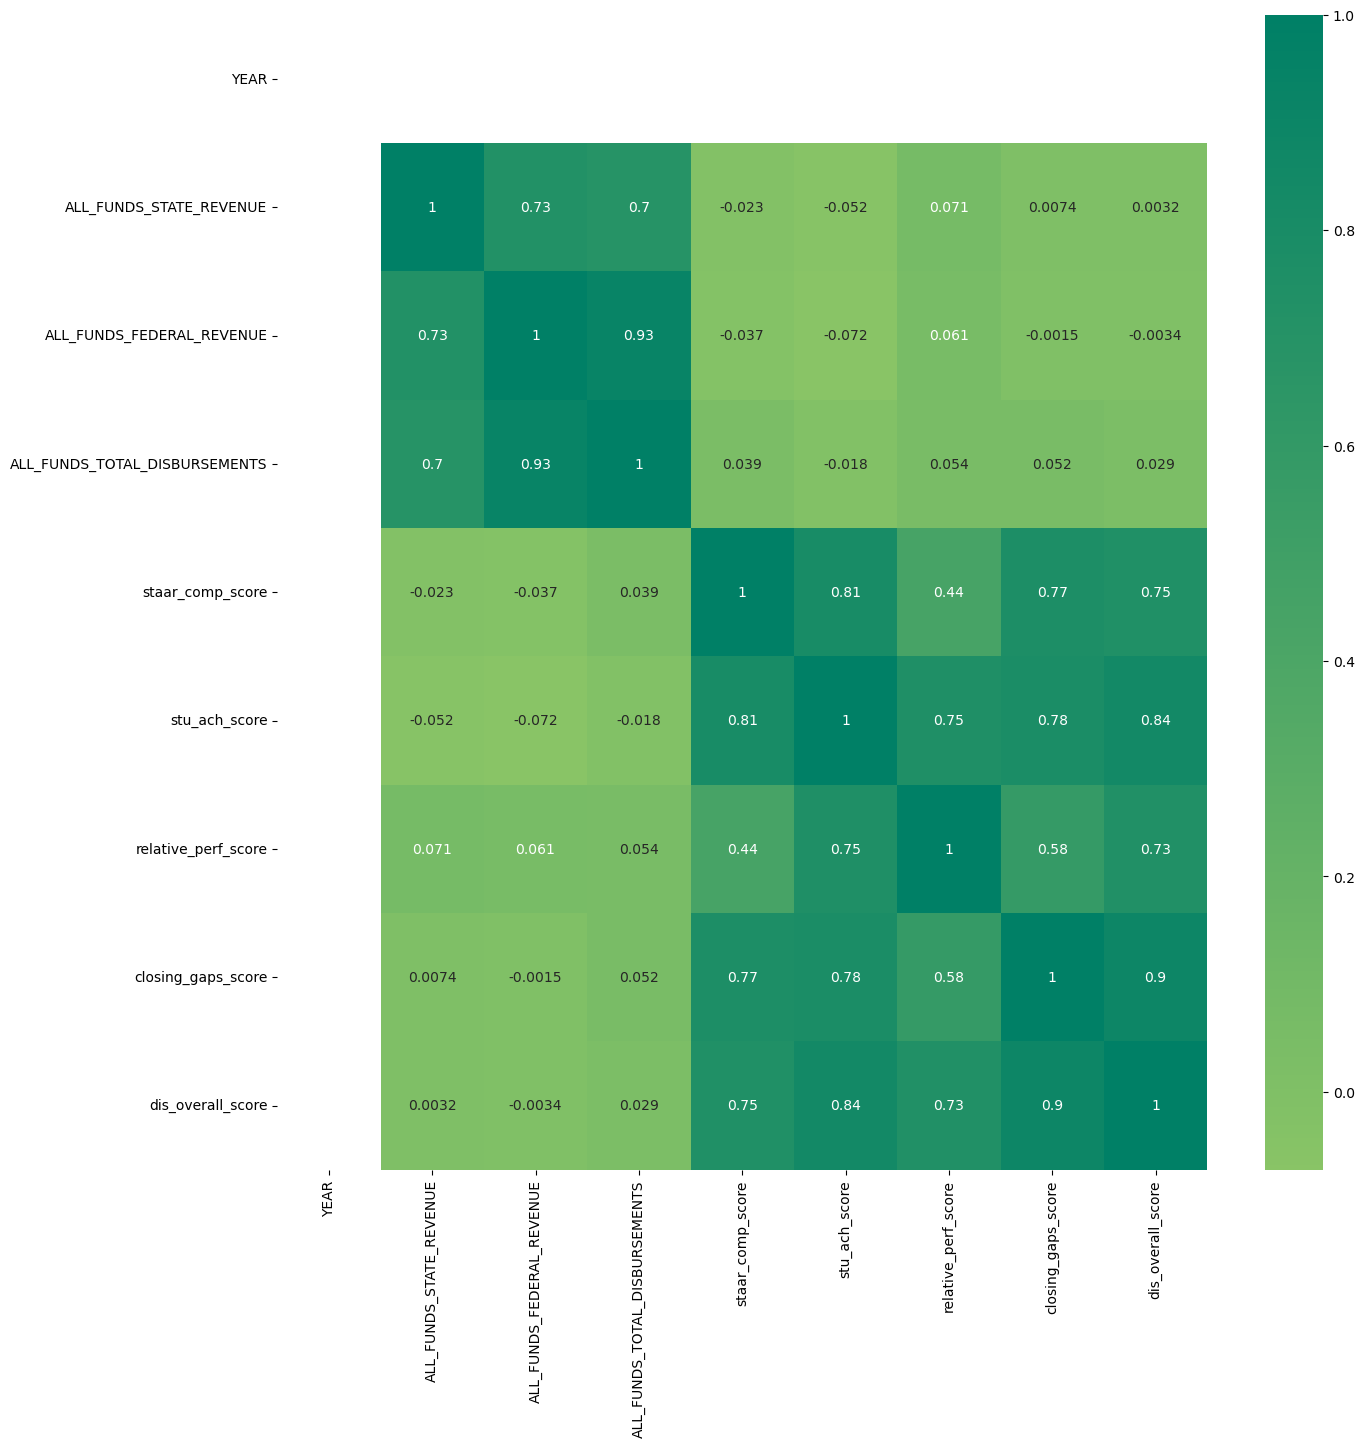

In [269]:
#correlation matrix
corrmat= fin_analysis_query.corr()
plt.figure(figsize=(15,15))  
sns.heatmap(corrmat,annot=True, cmap= 'summer_r', center=0)